#1. Introduction :
What dataset is about (Netflix titles, movies & TV shows).

Columns: title, type, director, cast, country, release_year, rating, duration, etc.

Goal: Understand content trends, genres, countries, and ratings

# 2. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

#3. Load Dataset

In [ ]:
df=pd.read_csv("netflix_titles.csv")

# 4. Basic Info & Cleaning
###What does the dataset contain?

###How many rows and columns?

###What are the column names?

###Data types of each column?

In [ ]:
df.columns.unique()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
161,s162,Movie,Mars Attacks!,Tim Burton,"Jack Nicholson, Glenn Close, Annette Bening, P...",United States,"September 1, 2021",1996,PG-13,106 min,"Comedies, Cult Movies, Sci-Fi & Fantasy","As flying saucers head for Earth, the presiden..."
3396,s3397,Movie,ChuChuTV Surprise Eggs Learning Videos (English),NaN,NaN,NaN,"October 18, 2019",2019,TV-Y,61 min,Children & Family Movies,From colors and letters to animals of all kind...
4373,s4374,Movie,Puppy Star Christmas,Robert Vince,"Kaitlyn Maher, Mackenzie Sol, Makenzie Moss, D...","United States, Canada","November 20, 2018",2018,PG,91 min,"Children & Family Movies, Comedies",A new pack of Pup Star pooches stumbles upon a...
7470,s7471,Movie,Miss Stevens,Julia Hart,"Lily Rabe, Timothée Chalamet, Lili Reinhart, A...",United States,"December 19, 2016",2016,NR,86 min,"Dramas, Independent Movies",Emotionally vulnerable teacher Rachel accompan...
1011,s1012,Movie,Free to Play,NaN,NaN,United States,"April 19, 2021",2014,TV-14,76 min,Documentaries,This documentary follows three professional vi...


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### 🔄 Duplicate Check

No duplicate rows found in the dataset using `df.duplicated().sum()`. Hence, no action taken.


In [ ]:
df.duplicated().sum()
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#### Step 1: Convert to datetime then missing NaN to Forward fill missing values	For dates or sequential data

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].ffill()


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


 ### we selects NAN  first most frequent value from that Series.
### may  duration can be defferent type like duration for seasons

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])


### NaN for director and cast and country we chanded Unkoun or Not Specified and we handle Nan values

In [ ]:
df['director'].fillna('Unknown')
df['cast'].fillna('Not Specified')
df['country'].fillna('Unknown')
df = df[~df['rating'].str.contains('min', na=False)]

df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


# 4. Exploratory Data Analysis
   - Univariate
   - Bivariate
   

## Univariate Analysis (Single Column Exploration)

###Distribution of Movie and TV Show
From the countplot below, it's evident that Movies significantly outnumber TV Shows in the Netflix dataset.
Movies are roughly twice as many as TV Shows, suggesting that Netflix’s content library leans heavily towards movie offerings.

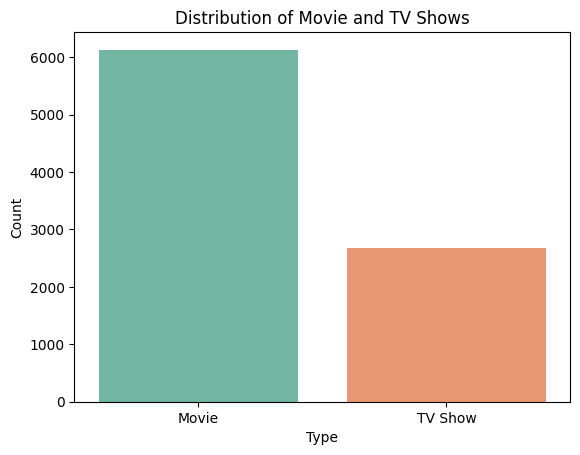

In [ ]:
sns.countplot(data=df, x='type' ,hue='type',palette='Set2')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movie and TV Shows')
plt.savefig("countplot.png", dpi=300)
plt.show()

In [ ]:
df['type'].value_counts(normalize=True) * 100


,proportion
type,
Movie,69.604725
TV Show,30.395275


###Distribution of Movie and TV Shows

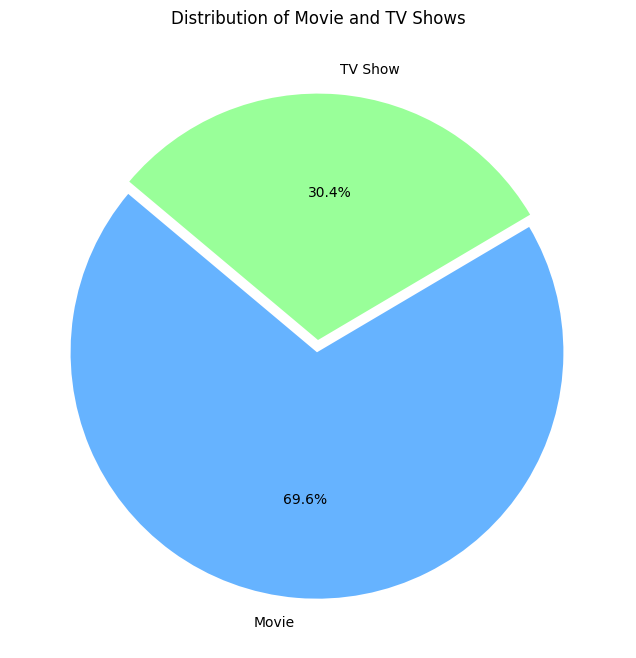

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index,  autopct='%1.1f%%',colors=['#66b3ff','#99ff99'],startangle=140, explode=(0.05,0)
)
plt.title('Distribution of Movie and TV Shows')
plt.show()

###Distribution of Rating

###Distribution of Rating
###Standard Ratings:
G → General Audience — Suitable for all ages.
PG → Parental Guidance Suggested — Some material may not be suitable for children.

PG-13 → Parents Strongly Cautioned — May be inappropriate for children under 13.

R → Restricted — Under 17 requires accompanying parent or adult guardian.

NC-17 → Adults Only — No one 17 and under admitted.

TV-Y → All Children — Suitable for all children, including very young.

TV-Y7 → Older Children — Suitable for kids age 7 and up.

TV-Y7-FV → TV-Y7 with Fantasy Violence — For kids 7+ with some fantasy violence.

TV-G → General Audience — Suitable for all ages.

TV-PG → Parental Guidance Suggested — Some content may not be suitable for kids.

TV-14 → Parents Strongly Cautioned — Not suitable for children under 14.

TV-MA → Mature Audience Only — For adults only.

UR → Unrated — No official rating provided.

NR → Not Rated — Not officially rated by any organization.




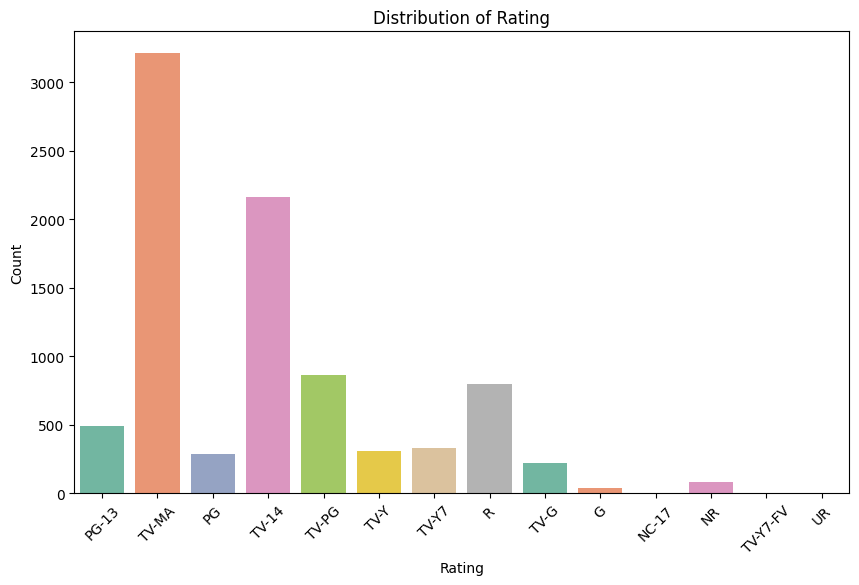

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating' ,hue='rating',palette='Set2')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.xticks(rotation=45)
plt.savefig("countplot1.png", dpi=300)
plt.show()

####From the countplot above, it's evident that the most common ratings in the Netflix dataset are:

TV-MA (Mature Audience Only): Content intended for adults only.

TV-14 (Parents Strongly Cautioned): May not be suitable for children under 14.

This suggests that a significant portion of Netflix content is targeted toward mature or older teen audiences, indicating a strong focus on adult-oriented shows and movies.

###Distribution of Release Years
#### Observation from Histogram:
Most titles were released between 2010 and 2020.

There’s a steep rise starting around 2010, peaking close to 2018–2019.

Very few shows exist before 2000 (which aligns with Netflix’s original content strategy evolving over time).

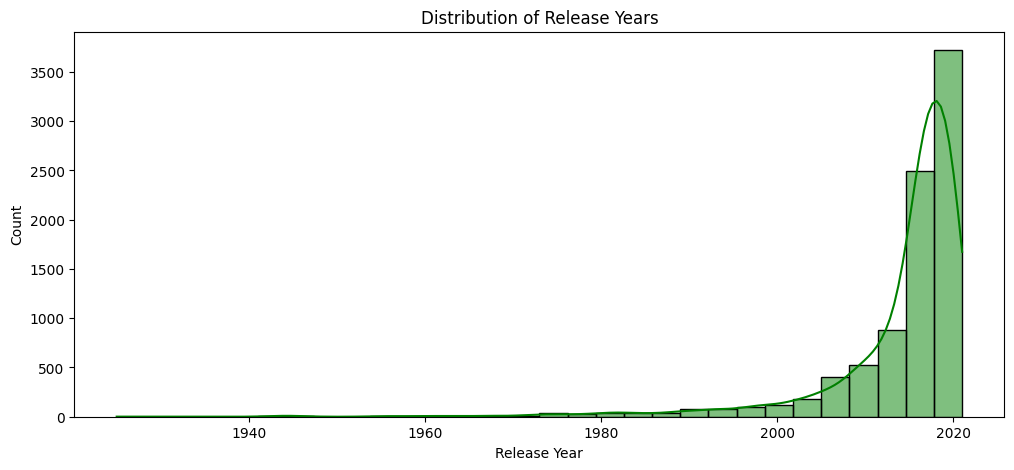

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='release_year', bins=30, kde=True, multiple='stack', color='green')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.savefig("hist.png", dpi=300)
plt.show()


###Top 10 Countries with Most Netflix Shows
USA dominates Netflix content production

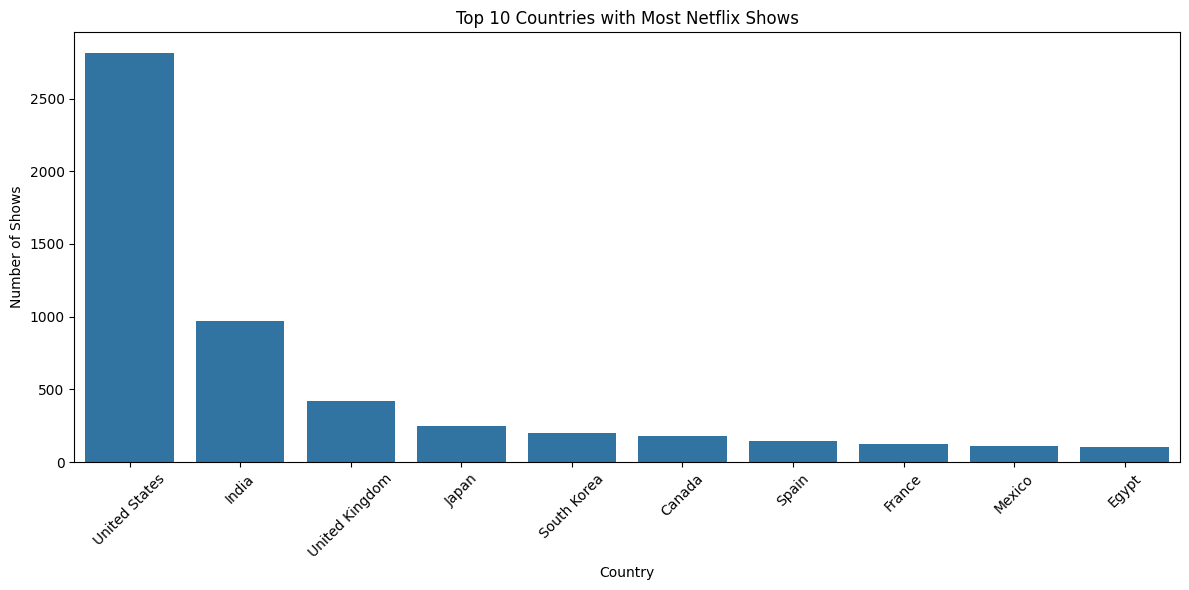

In [ ]:
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Netflix Shows')
plt.ylabel('Number of Shows')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar.png", dpi=300)
plt.show()

# Bivariate analysis
###Movie Duration by Rating

1. Spread
Each box shows 25th percentile (Q1) to 75th percentile (Q3) range of movie durations for each rating.

Vertical line inside the box = median duration.

2. Observations
PG-13, PG, TV-MA, TV-14 have longer median durations (~100–120 min).

TV-Y, TV-Y7 (kids) have shorter durations (~50–70 min).

NC-17, R also have high spread, indicating some very long movies.

3. Outliers
Dots outside whiskers are outliers (extremely long/short movies).

Example: TV-MA and TV-PG ratings have some movies >300 min.

4. Insights
Adult-rated content (TV-MA, R) tends to have higher variation and longer movies.


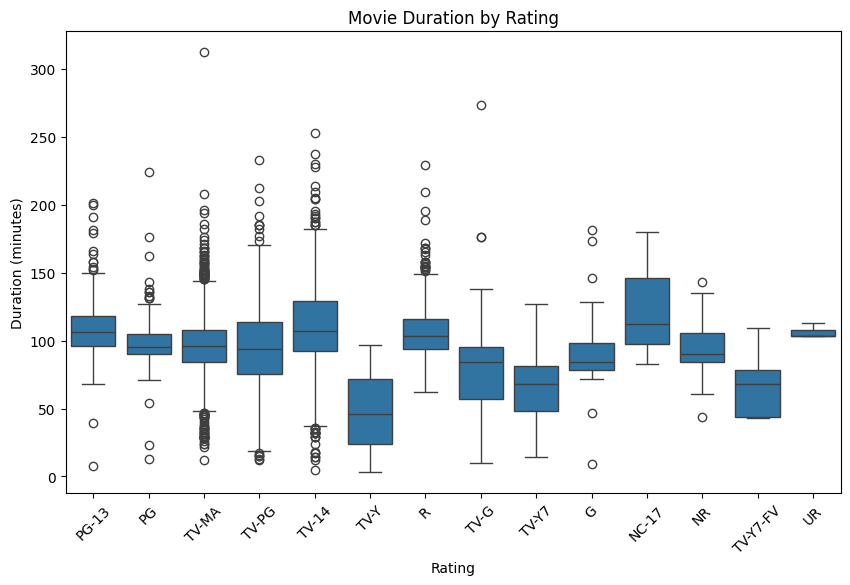

In [ ]:

df_movie = df[df['type'] == 'Movie'].copy()
df_movie['duration_min'] = df_movie['duration'].str.extract(r'(\d+)').astype(float)


num_ratings = df_movie['rating'].nunique()
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_movie,
    x='rating',
    y='duration_min'
    )
plt.title('Movie Duration by Rating')
plt.xticks(rotation=45)
plt.ylabel('Duration (minutes)')
plt.xlabel('Rating')
plt.savefig("box.png", dpi=300)
plt.show()


###Movie Duration Over Time

Kids-rated content (TV-Y, TV-Y7) is consistently shorter.
Trend Observations
Movies before 1960 had lower durations (~50–80 min).

Around 1960–1970, durations peaked 200+ minutes (epic films era).

After 1980, durations became more stable (~100–120 min).

Recently (2000–2020), there’s a slight decline toward shorter movies (~90–100 min).




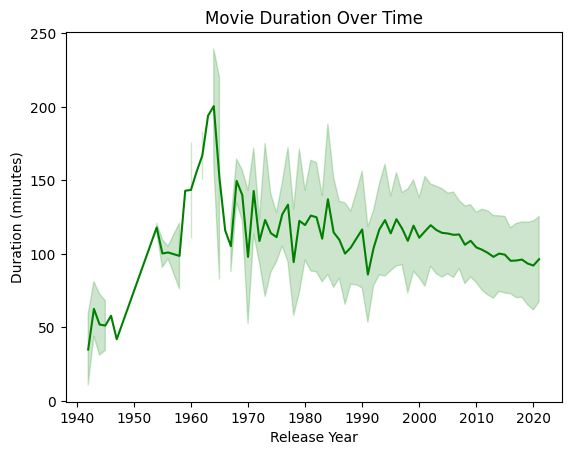

In [ ]:
sns.lineplot(data=df_movie, x='release_year', y='duration_min',errorbar='sd', color='green')
plt.title('Movie Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.savefig("line.png", dpi=300)
plt.show()

###Movie Duration Over Time by Rating

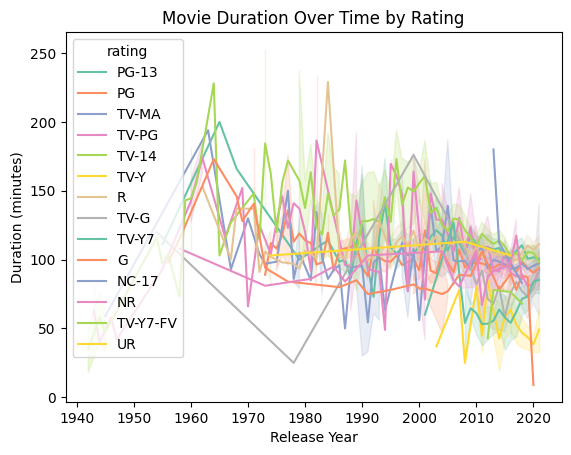

In [ ]:
sns.lineplot(data=df_movie, x='release_year', y='duration_min',errorbar='ci', hue='rating', palette='Set2')
plt.title('Movie Duration Over Time by Rating')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.savefig("line1.png", dpi=300)
plt.show()

## 5. Feature Engineering

In [ ]:
df = df.copy()

df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month


df_cast = df.dropna(subset=['cast']).copy()
actors = df_cast['cast'].str.split(',').explode().str.strip()


df_combo = df.dropna(subset=['listed_in', 'rating']).copy()  #
df_combo = df_combo.assign(genre=df_combo['listed_in'].str.split(',')).explode('genre')
df_combo['genre'] = df_combo['genre'].str.strip()


In [ ]:
combo_counts = (df_combo.groupby(['genre', 'rating']).size().reset_index(name='count').sort_values(by='count', ascending=False))

In [ ]:
df_country_combo = df.dropna(subset=['listed_in', 'rating', 'country'])
df_country_combo = df_country_combo.assign(genre=df_country_combo['listed_in'].str.split(',')).explode('genre')
df_country_combo['genre'] = df_country_combo['genre'].str.strip()


combo_counts_country = (df_country_combo.groupby(['country', 'genre', 'rating']).size().reset_index(name='count').sort_values(by='count', ascending=False))

print(combo_counts_country.head(10))


            country                 genre rating  count
1480          India  International Movies  TV-14    491
1460          India                Dramas  TV-14    365
3701  United States                Dramas      R    212
1482          India  International Movies  TV-MA    198
1440          India              Comedies  TV-14    196
3810  United States       Stand-Up Comedy  TV-MA    174
3690  United States         Documentaries  TV-MA    159
1462          India                Dramas  TV-MA    156
3704  United States                Dramas  TV-MA    140
3725  United States    Independent Movies  TV-MA    126


In [ ]:
top_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_countries)].dropna(subset=['listed_in', 'rating'])
df_top_countries = df_top_countries.assign(genre=df_top_countries['listed_in'].str.split(',')).explode('genre')
df_top_countries['genre'] = df_top_countries['genre'].str.strip()
combo_counts_country = (
    df_top_countries.groupby(['country', 'genre', 'rating'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print(combo_counts_country.head(20))


           country                     genre rating  count
55           India      International Movies  TV-14    491
35           India                    Dramas  TV-14    365
471  United States                    Dramas      R    212
57           India      International Movies  TV-MA    198
15           India                  Comedies  TV-14    196
580  United States           Stand-Up Comedy  TV-MA    174
460  United States             Documentaries  TV-MA    159
37           India                    Dramas  TV-MA    156
474  United States                    Dramas  TV-MA    140
495  United States        Independent Movies  TV-MA    126
435  United States                  Comedies      R    124
434  United States                  Comedies  PG-13    122
492  United States        Independent Movies      R    121
58           India      International Movies  TV-PG    111
602  United States                 TV Dramas  TV-MA    106
596  United States               TV Comedies  TV-MA    1

In [ ]:
df_heat = df.dropna(subset=['listed_in', 'rating'])
df_heat = df_heat.assign(genre=df_heat['listed_in'].str.split(',')).explode('genre')
df_heat['genre'] = df_heat['genre'].str.strip()
pivot_table = df_heat.pivot_table( index='genre', columns='rating', values='title',   aggfunc='count',    fill_value=0)


#6.Time-Based Analysis
###Seasonal Additions: Content Added by Month:
July and December show the highest additions. December’s spike aligns with holiday content strategy (Christmas releases, end-of-year refresh). July spikes likely due to mid-year releases or summer streaming demand.



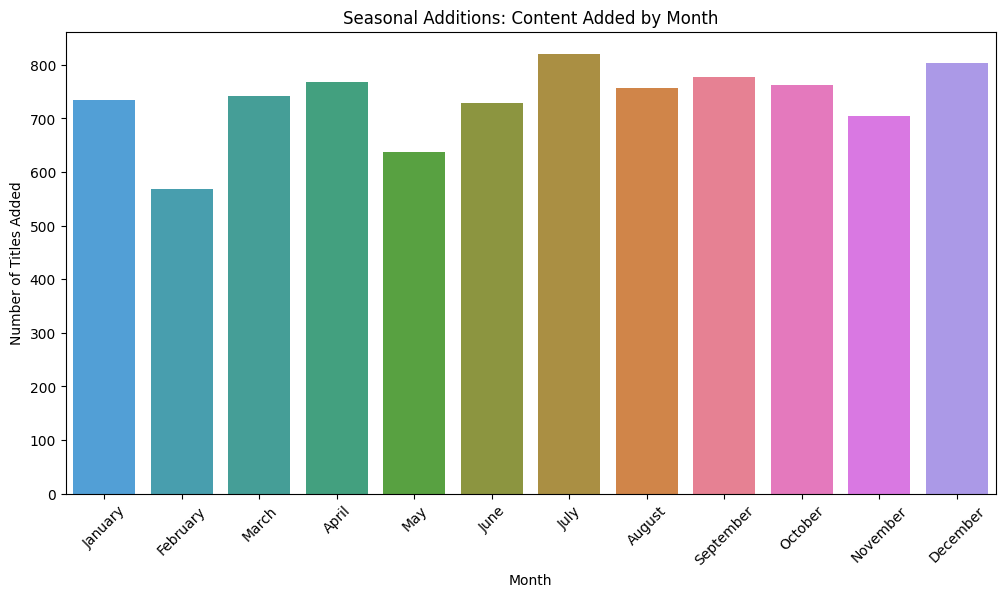

In [ ]:
df['month'] = df['date_added'].dt.month_name()
plt.figure(figsize=(12,6))
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(x='month', data=df, order=month_order,hue='month')
plt.title('Seasonal Additions: Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.savefig("countplot2.png", dpi=300)
plt.show()

###'Delay Between Release and Addition to Netflix
Most titles have very short delays (0–2 years)

The bar near 0 is the tallest (≈ 6000 titles).

This means Netflix adds most content shortly after release.

Few titles have medium delays (5–20 years)

The count gradually decreases as the delay increases.

Older shows/movies are sometimes added later to enrich the catalog.

Very rare extreme delays (40–80 years)

Almost negligible — these are probably classic films added decades later.

Right-skewed distribution

Most values are clustered near zero with a long tail extending right.

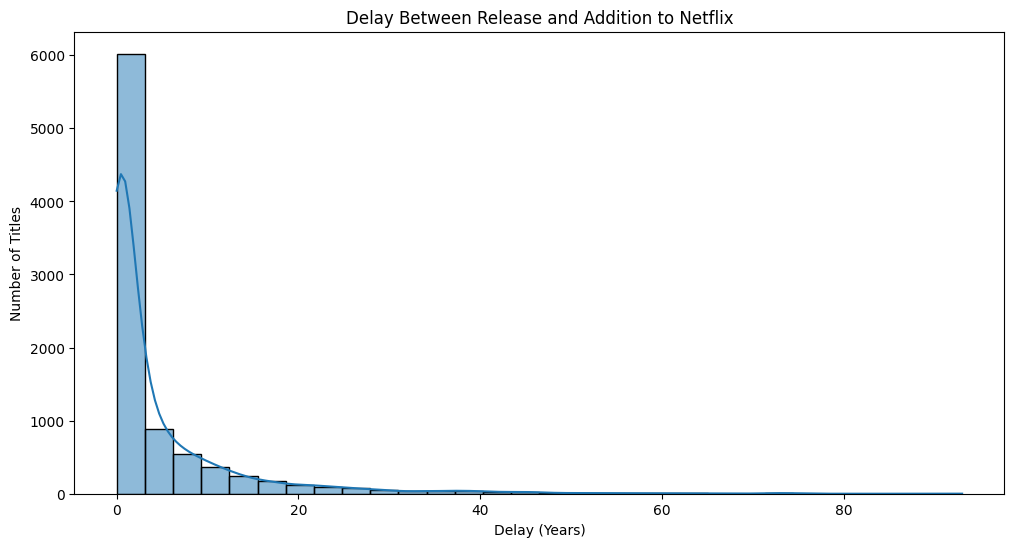

In [ ]:


df['year_added'] = df['date_added'].dt.year
df['delay'] = df['year_added'] - df['release_year']


df = df[df['delay'] >= 0]

plt.figure(figsize=(12,6))
sns.histplot(df['delay'], bins=30, kde=True)
plt.title('Delay Between Release and Addition to Netflix')
plt.xlabel('Delay (Years)')
plt.ylabel('Number of Titles')
plt.savefig("hist1.png", dpi=300)
plt.show()


###Interpretation
Netflix primarily focuses on recent releases to stay competitive.

However, it occasionally adds archival or classic content (hence the long tail).

The trend suggests Netflix does not heavily rely on very old content for growth.

###Average Delay Trend Over Time
Early years (2015–2017): Higher delays (Netflix added many older titles).

Recent years (2018+): Delay decreases (focus on adding fresh content quickly).

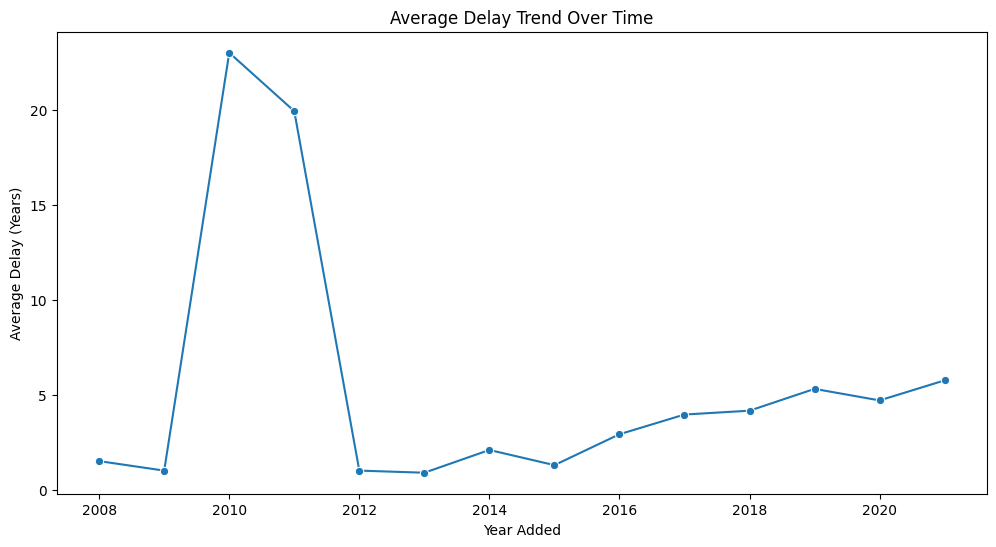

In [ ]:
delay_trend = df.groupby('year_added')['delay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='year_added', y='delay', data=delay_trend, marker='o')
plt.title('Average Delay Trend Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Delay (Years)')
plt.savefig("line2.png", dpi=300)
plt.show()


#7. Advanced Questions
###Who are the most frequent actors (from cast)?
Anupam Kher, Shah Rukh Khan, and Julie Tejwani are the most frequently appearing actors, indicating a large presence of Indian cinema and anime voice actors in Netflix’s catalog.
###Top directors and how many shows they’ve directed?
Rajiv Chilaka is directed 	19 movies,Raúl Campos and  Jan Suter	18 movies directed.

###Country vs genre popularity

In [ ]:
df['director'].value_counts().head(10)
df.groupby(df['type'])['director'].value_counts().head(10)
actor_counts = actors.value_counts().head(10)
print(actor_counts)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


###Most common combinations of genre + rating?
The most common combinations are International Movies + TV-MA and International Movies + TV-14, with over 1,000 titles each.

Dramas and International TV Shows dominate the next positions, primarily rated TV-MA or TV-14.

Comedies also feature prominently, though less than dramas.

Very few titles are rated R, showing Netflix favors TV ratings (TV-MA/TV-14) over film ratings (R/PG).

In [ ]:
print(combo_counts.head(10))

                      genre rating  count
140    International Movies  TV-MA   1130
138    International Movies  TV-14   1065
103                  Dramas  TV-MA    831
149  International TV Shows  TV-MA    715
101                  Dramas  TV-14    693
147  International TV Shows  TV-14    472
60                 Comedies  TV-14    465
268               TV Dramas  TV-MA    434
62                 Comedies  TV-MA    431
100                  Dramas      R    375


#8. Visualizations
###Most Common Genre + Rating Combinations on Netflix
The most common combinations are International Movies + TV-MA and International Movies + TV-14, with over 1,000 titles each.

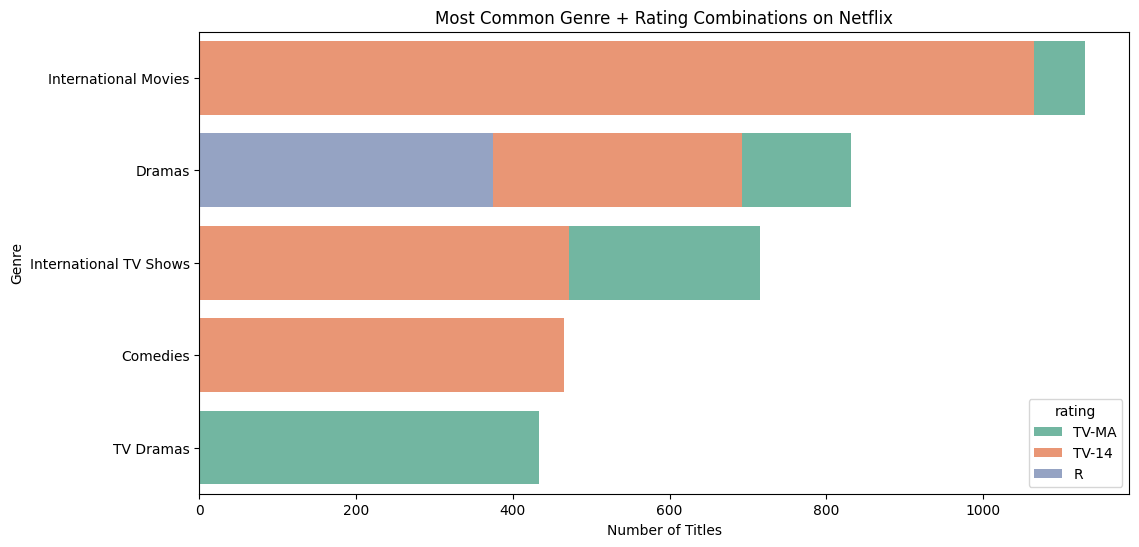

In [ ]:
top_10_combos = combo_counts.head(10)
plt.figure(figsize=(12,6))
sns.barplot(    x='count',  y='genre',   hue='rating',  data=top_10_combos,  dodge=False,  palette='Set2')
plt.title("Most Common Genre + Rating Combinations on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.savefig("bar1.png", dpi=300)
plt.show()


###Country vs genre popularity

###Word Cloud of Netflix Genres

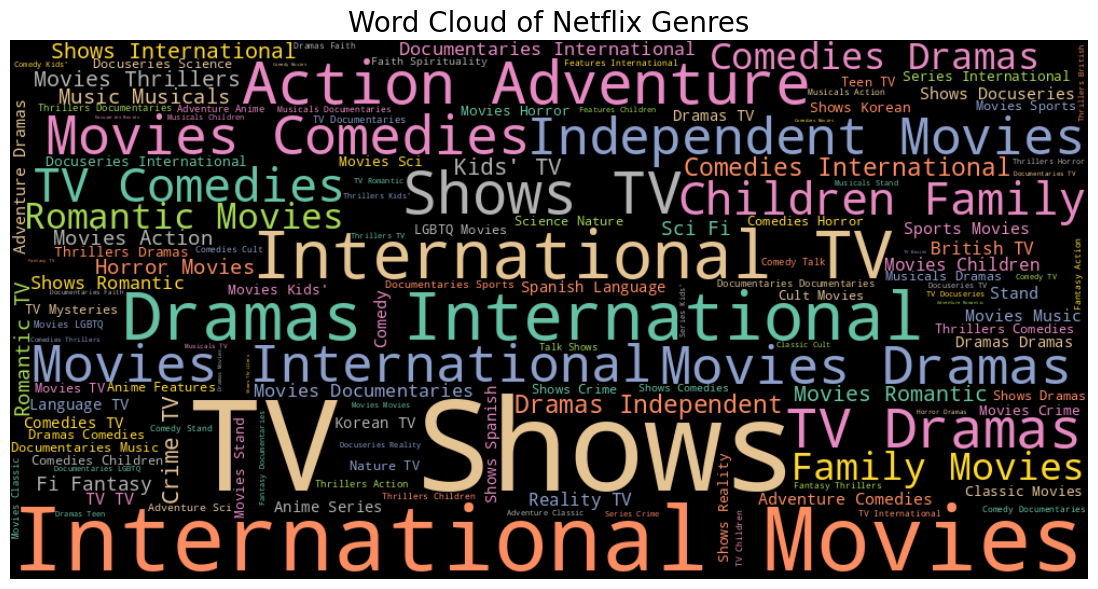

In [ ]:
text = ' '.join(df['listed_in'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Genres", fontsize=20)
plt.savefig("word.png", dpi=300)
plt.show()


###Heatmap: Genre vs Rating (Count of Titles)
####Observations from the heatmap:
TV-14 and TV-MA ratings dominate:

Most Netflix titles fall under TV-14 (teens and above) or TV-MA (mature audience).

These categories are heavily represented across genres like Dramas, Comedies, Documentaries, International Movies, and Kids’ TV.

International Movies stand out:

A significant count of titles (dark blue areas) under TV-14 and TV-MA ratings.

Documentaries and Dramas are popular:

Documentaries and dramas also have high concentrations, mostly in TV-14 and TV-MA.

Children’s content (Kids’ TV, Children & Family Movies):

Largely appears in TV-Y, TV-Y7, and G ratings (lighter areas, but still visible).

Low representation of NC-17 and UR:

Very few or no titles are rated NC-17 (adult only) or UR (unrated).



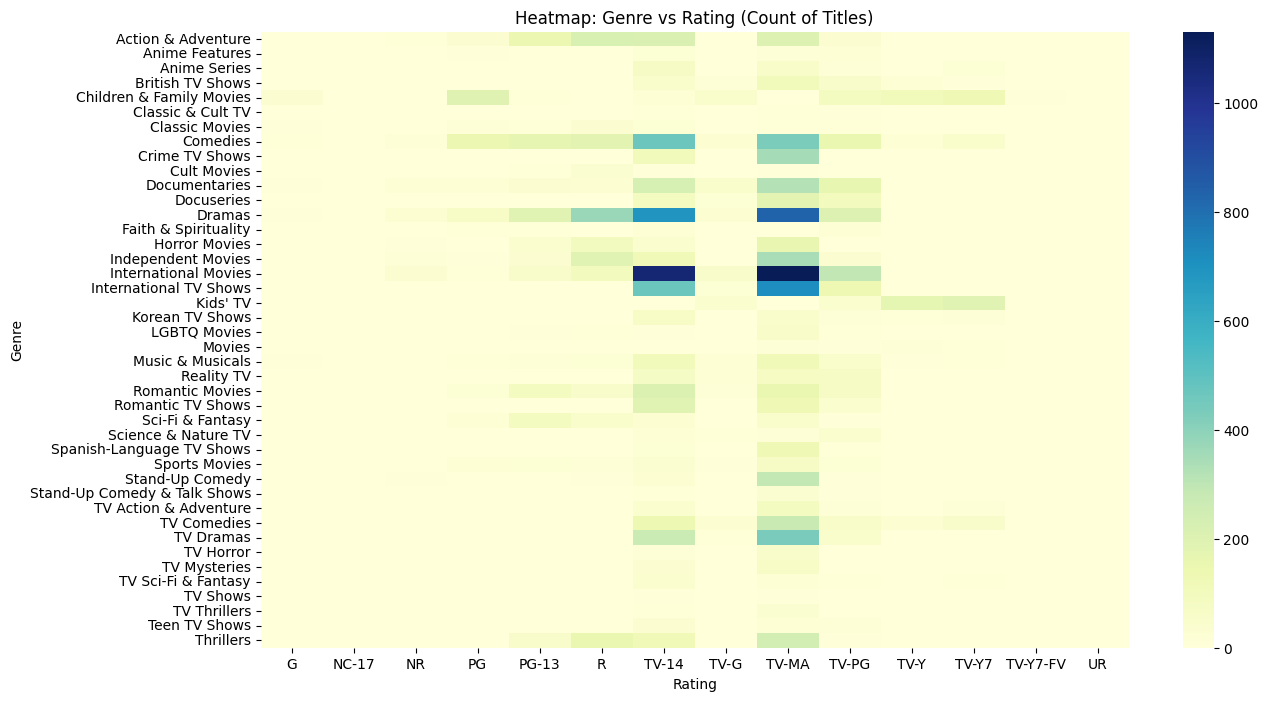

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title("Heatmap: Genre vs Rating (Count of Titles)")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.savefig("heatmap.png", dpi=300)
plt.show()


#9. Summary & Insights
##1. What kind of content is dominant on Netflix?
Netflix primarily offers TV Shows and Movies, but TV Shows have increased rapidly in recent years.

The majority of titles are targeted at teen and adult audiences (TV-14 and TV-MA ratings dominate).

##2. Has Netflix been adding more content over time?
A steady rise in content addition is visible, especially after 2015 when Netflix expanded globally.

Peak content addition was around 2018–2020, after which growth slowed slightly.

##3. Which genres are most popular?
Drama, International Movies, Documentaries, and Comedies dominate the catalog.

International Movies (esp. from India, Korea, Spain) show high presence, reflecting Netflix’s global strategy.

##4. Which countries produce most Netflix content?
United States leads by a large margin.

India, United Kingdom, Japan, South Korea, Canada, and Spain are also significant contributors.

Clear rise in non-US content, highlighting Netflix’s focus on regional productions.

##5. Any interesting pattern in ratings?
TV-14 and TV-MA are the most frequent ratings (teen and adult audiences).

Kids' ratings (TV-Y, G, TV-Y7) are present but much fewer, indicating Netflix focuses more on mature audiences.

Very few NC-17 or UR (unrated) titles exist.

#Conclusion

Netflix’s library caters mainly to teens and adults with genres like drama, documentaries, and international content dominating.

Content production and acquisition peaked post-2015, aligning with Netflix’s global expansion strategy.

Non-US content, especially from India, South Korea, and Spain, is increasingly significant.

The dominance of TV-14 and TV-MA ratings reflects the platform’s focus on storytelling for mature viewers rather than kids.



In [ ]:
df.to_csv("Netflix_cleaned.csv", index=False)
